In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [5]:
# Load the dataset
df = pd.read_csv(r"D:\Jupyter Notebook\Contribution\Stock-Price-Prediction\Data\SBIN.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [6]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [8]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [9]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train.shape

(5659, 4)

In [13]:
X_test.shape

(1415, 4)

In [14]:
# Function to evaluate and print RMSE, MAE, and MAPE
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}\n")

    return rmse, mae, mape


In [15]:

metrics = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": []
}

# **1. Linear Regression**

In [16]:
# Create a linear regression model
model1 = LinearRegression()

In [17]:
y_train.head()

5286    257.350006
3408    129.464996
5477    279.350006
6906    588.500000
530      21.644367
Name: Close, dtype: float64

In [18]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [19]:
rmse, mae, mape = evaluate_model(model1, X_test, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 1.6881364643681729
MAE: 0.9433353485344458
MAPE: 0.006085435990852853



# 2. Support Vector Regression

In [20]:
# Create an SVR model
model2 = SVR()

In [21]:
# Train the model
model2.fit(X_train, y_train)

SVR()

In [22]:
rmse, mae, mape = evaluate_model(model2, X_test, y_test)
metrics["Model"].append("SVR")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 147.71103599153602
MAE: 110.99419106508152
MAPE: 1.9715076513294716



# 3. Random Forest Regressor

In [23]:
model3 = RandomForestRegressor()

In [24]:
# Train the model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
rmse, mae, mape = evaluate_model(model3, X_test_scaled, y_test)
metrics["Model"].append("Random Forest")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.93042098590243
MAE: 162.9878683280432
MAPE: 0.7508043759857392



C:\Users\DEEPANSHU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# 4. Gradient Boosting Models

In [26]:
model4 = GradientBoostingRegressor()

In [27]:
# Train the model
model4.fit(X_train, y_train)

GradientBoostingRegressor()

In [28]:
rmse, mae, mape = evaluate_model(model4, X_test_scaled, y_test)
metrics["Model"].append("GBM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.41069433522418
MAE: 162.27122816197573
MAPE: 0.7378541693598378



C:\Users\DEEPANSHU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# 5. Extreme Graident Boosting

In [29]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [30]:
# Train the model
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
rmse, mae, mape = evaluate_model(model5, X_test_scaled, y_test)
metrics["Model"].append("XGBoost")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.66436370022384
MAE: 162.62070643817412
MAPE: 0.7441437311249671



# 6. AdaBoost Regressor

In [32]:
model6 = AdaBoostRegressor()

In [33]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [34]:
rmse, mae, mape = evaluate_model(model6, X_test_scaled, y_test)
metrics["Model"].append("AdaBoost Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 211.58009272421995
MAE: 150.12127349523968
MAPE: 0.709215367666854



C:\Users\DEEPANSHU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


# 7. Decision Tree

In [35]:
model7 = DecisionTreeRegressor()

In [36]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
rmse, mae, mape = evaluate_model(model7, X_test_scaled, y_test)
metrics["Model"].append("Decision Tree")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 225.19713405326468
MAE: 163.35574713804317
MAPE: 0.7574890717636951



C:\Users\DEEPANSHU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# 8. KNeighbors Regressor

In [38]:
# Create a KNN model
model8 = KNeighborsRegressor()

In [39]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [40]:
rmse, mae, mape = evaluate_model(model8, X_test_scaled, y_test)
metrics["Model"].append("KNN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.35603706259303
MAE: 162.1962430618594
MAPE: 0.7365233640314862



C:\Users\DEEPANSHU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# 9. Artificial Neural Networks

In [41]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

C:\Users\DEEPANSHU\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [44]:
rmse, mae, mape = evaluate_model(model9, X_test_scaled, y_test)
metrics["Model"].append("ANN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE: 2.7823218514274872
MAE: 1.7367742329144598
MAPE: 0.011622923464328404



# 10. Long Short Term Memory

In [45]:
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])

In [50]:
model10 = Sequential()
model10.add(LSTM(128, return_sequences = True, input_shape=(n_steps, n_features)))
model10.add(LSTM(64, return_sequences = True))
model10.add(LSTM(32, return_sequences = False))
model10.add(Dense(64))
model10.add(Dense(1))

In [51]:
# Compile the model
model10.compile(loss='mean_squared_error', optimizer='adam')


In [52]:
model10.fit(X_train_reshaped, y_train[n_steps-1:], epochs=50, batch_size=32, verbose=0)

In [53]:
rmse, mae, mape = evaluate_model(model10, X_test_reshaped, y_test[n_steps-1:])

# Store metrics
metrics["Model"].append("LSTM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
RMSE: 3.3970840606919817
MAE: 2.3823417967059495
MAPE: 0.023917546379577784



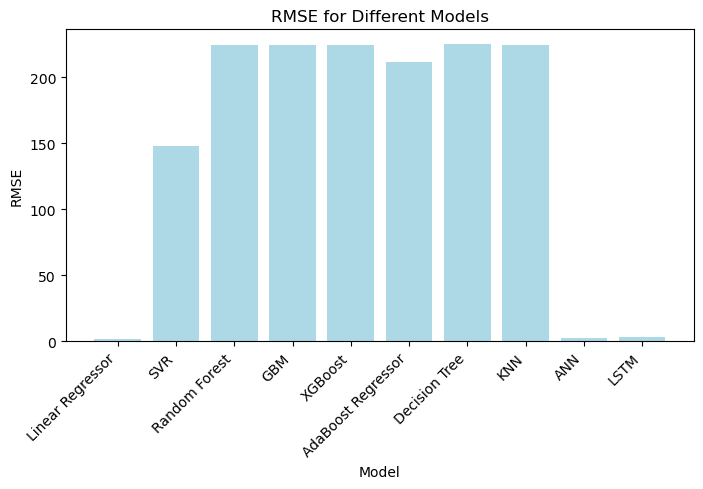

In [54]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(20, 5))

# RMSE Plot
plt.subplot(1, 3, 1)
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='lightblue')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45,ha='right')
plt.title('RMSE for Different Models')

plt.tight_layout()
plt.show()


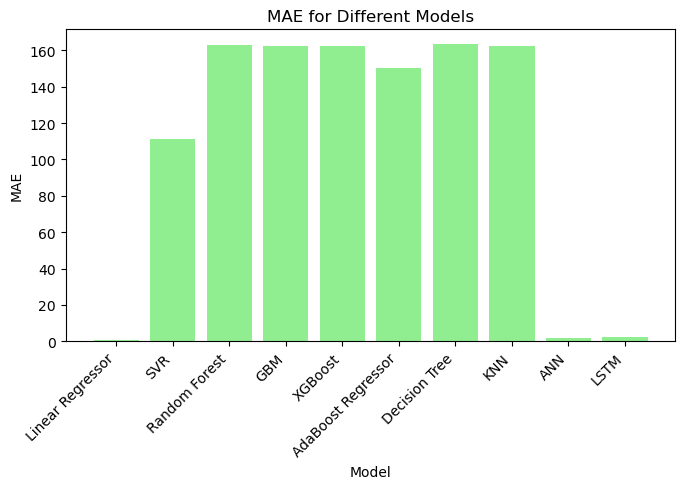

In [55]:
# MAE Plot
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 2)
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='lightgreen')  # Changed to plt.bar()
plt.ylabel('MAE')  # Set y-label to MAE
plt.xlabel('Model')  # Set x-label to Model
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.title('MAE for Different Models')

plt.tight_layout()
plt.show()


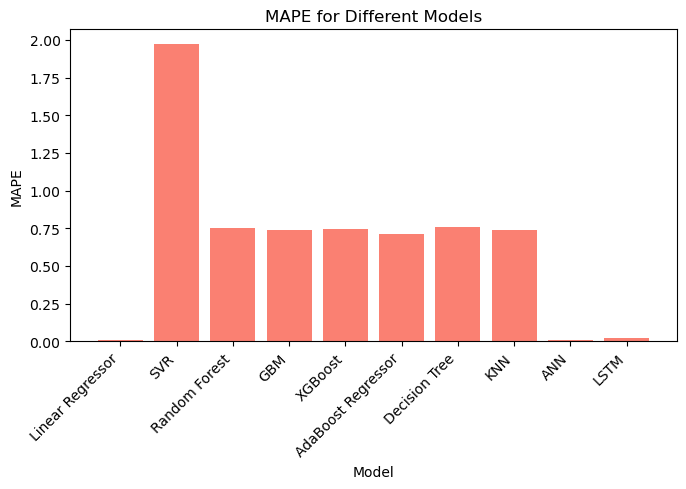

In [56]:
# MAPE Plot
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 3)
plt.bar(metrics_df['Model'], metrics_df['MAPE'], color='salmon')
plt.ylabel('MAPE')
plt.xlabel('Model')
plt.xticks(rotation=45,ha='right')
plt.title('MAPE for Different Models')

plt.tight_layout()
plt.show()
